In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageOps 
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [2]:
def assign_label(img,flower_type):
    return flower_type

In [3]:
X=[]
Z=[]

In [4]:
def make_train_data(flower_type,DIR):
    for img in os.listdir(DIR):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = Image.open(path)
        img_gray = ImageOps.grayscale(img)
        img_gray = img_gray.resize((28,28))
        X.append(np.array(img_gray))
        Z.append(str(label))

In [5]:
make_train_data('Daisy','flowers\daisy')
make_train_data('Dandelion','flowers\dandelion')
make_train_data('rose','flowers/rose')
make_train_data('sunflower','flowers\sunflower')
make_train_data('tulip','flowers/tulip')

In [6]:
labels = LabelEncoder()
Y = labels.fit_transform(Z)
X = np.array(X)
print(X.shape)
X = X/255

(4317, 28, 28)


In [7]:
print(Y.shape)
print(X.shape)


(4317,)
(4317, 28, 28)


In [8]:
train_images,test_images , train_labels, test_labels = train_test_split(X,Y, test_size=0.13, random_state=42)

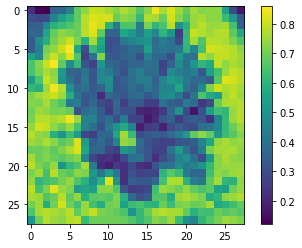

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

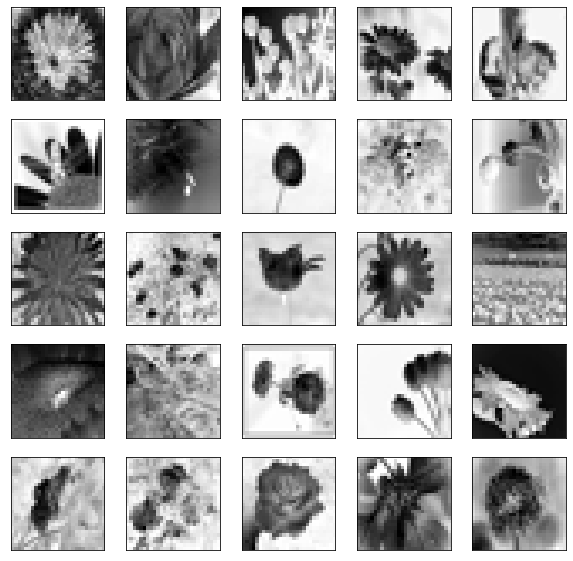

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

In [11]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(1000,activation='relu'),
        tf.keras.layers.Dense(500, activation='relu'),
        tf.keras.layers.Dense(250, activation='relu'),
        tf.keras.layers.Dense(5)])

In [12]:
model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [13]:
model.fit(train_images,train_labels, epochs=150)

Epoch 1/150
118/118 [==============================] - 3s 14ms/step - loss: 1.5675 - accuracy: 0.2714
Epoch 2/150
118/118 [==============================] - 2s 14ms/step - loss: 1.5256 - accuracy: 0.3204
Epoch 3/150
118/118 [==============================] - 2s 15ms/step - loss: 1.5058 - accuracy: 0.3313
Epoch 4/150
118/118 [==============================] - 2s 15ms/step - loss: 1.4924 - accuracy: 0.3473
Epoch 5/150
118/118 [==============================] - 2s 15ms/step - loss: 1.4828 - accuracy: 0.3433
Epoch 6/150
118/118 [==============================] - 2s 13ms/step - loss: 1.4757 - accuracy: 0.3601
Epoch 7/150
118/118 [==============================] - 2s 14ms/step - loss: 1.4612 - accuracy: 0.3803
Epoch 8/150
118/118 [==============================] - 2s 13ms/step - loss: 1.4538 - accuracy: 0.3747
Epoch 9/150
118/118 [==============================] - 2s 14ms/step - loss: 1.4500 - accuracy: 0.3763
Epoch 10/150
118/118 [==============================] - 2s 15ms/step - loss: 1.438

Epoch 81/150
118/118 [==============================] - 1s 8ms/step - loss: 0.5841 - accuracy: 0.8067
Epoch 82/150
118/118 [==============================] - 1s 8ms/step - loss: 0.5652 - accuracy: 0.8245
Epoch 83/150
118/118 [==============================] - 1s 8ms/step - loss: 0.5647 - accuracy: 0.8210
Epoch 84/150
118/118 [==============================] - 1s 8ms/step - loss: 0.5428 - accuracy: 0.8189
Epoch 85/150
118/118 [==============================] - 1s 9ms/step - loss: 0.5181 - accuracy: 0.8373
Epoch 86/150
118/118 [==============================] - 1s 9ms/step - loss: 0.5017 - accuracy: 0.8466
Epoch 87/150
118/118 [==============================] - 1s 9ms/step - loss: 0.4952 - accuracy: 0.8495
Epoch 88/150
118/118 [==============================] - 1s 8ms/step - loss: 0.5002 - accuracy: 0.8471
Epoch 89/150
118/118 [==============================] - 1s 8ms/step - loss: 0.4712 - accuracy: 0.8479
Epoch 90/150
118/118 [==============================] - 1s 8ms/step - loss: 0.4957

In [14]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
print(predictions)

18/18 - 0s - loss: 2.9218 - accuracy: 0.3559 - 155ms/epoch - 9ms/step

Test accuracy: 0.35587188601493835
[[3.2421079e-01 1.8683532e-01 3.0725490e-02 1.3711645e-01 3.2111189e-01]
 [2.4767215e-03 8.1347071e-02 2.5469596e-03 2.3184085e-01 6.8178833e-01]
 [8.1179965e-01 1.8411477e-01 4.8052715e-04 3.5597472e-03 4.5404438e-05]
 ...
 [7.7519125e-01 7.2177252e-05 3.0874301e-04 2.1905173e-01 5.3761331e-03]
 [3.3889380e-03 1.6129572e-02 3.0249767e-03 9.7340119e-01 4.0552909e-03]
 [2.7704567e-02 2.7593754e-02 8.2043566e-02 3.5046313e-02 8.2761180e-01]]


In [15]:
actual_output=[]

In [16]:
for i in range(len(test_labels)):
    actual_output.append(np.argmax(predictions[i]))

In [17]:
confusion_matrix(test_labels,actual_output)

array([[45, 11, 14, 22, 14],
       [25, 43, 18, 33, 28],
       [14, 11, 27, 20, 25],
       [ 8,  3, 10, 45, 21],
       [21,  7, 23, 34, 40]], dtype=int64)